In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Input
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

In [4]:
(x_train,y_train),(_,_)=fashion_mnist.load_data()
print("x_train shape : "+str(x_train.shape))
print("y_train shape : "+str(y_train.shape))

x_train shape : (60000, 28, 28)
y_train shape : (60000,)


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

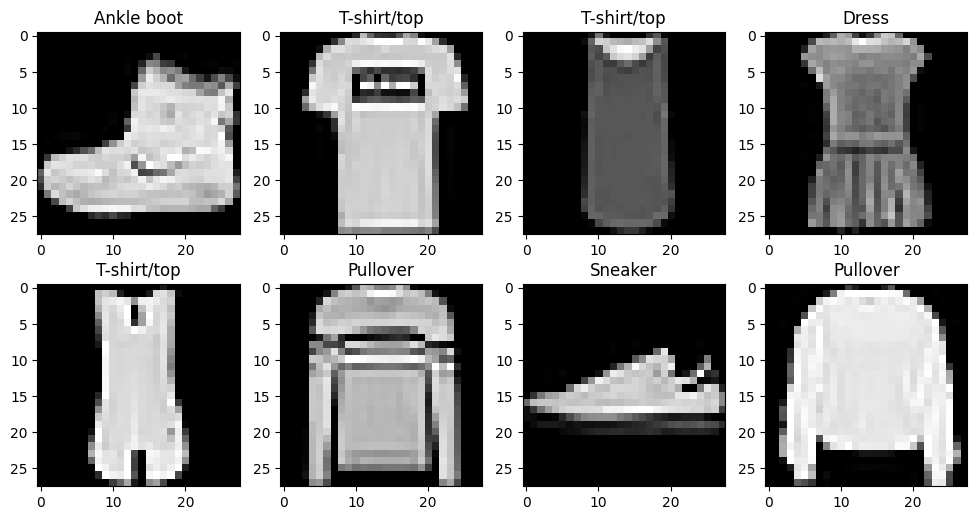

In [9]:
plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i],cmap="gray")
    plt.title(class_names[y_train[i]])
plt.show()

In [10]:
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples


In [11]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)

In [12]:
model=Sequential()

model.add(Input(shape=input_shape))
model.add(Conv2D(32,3,activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(64,3,activation="relu"))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(10,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [13]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
model.fit(x_train,y_train,validation_split=0.1,epochs=15,batch_size=128)

Epoch 1/15
422/422 [==============================] - 23s 52ms/step - loss: 0.7785 - accuracy: 0.7189 - val_loss: 0.4452 - val_accuracy: 0.8287
Epoch 2/15
422/422 [==============================] - 22s 51ms/step - loss: 0.4815 - accuracy: 0.8293 - val_loss: 0.3737 - val_accuracy: 0.8593
Epoch 3/15
422/422 [==============================] - 22s 52ms/step - loss: 0.4117 - accuracy: 0.8542 - val_loss: 0.3320 - val_accuracy: 0.8755
Epoch 4/15
422/422 [==============================] - 20s 48ms/step - loss: 0.3699 - accuracy: 0.8680 - val_loss: 0.3071 - val_accuracy: 0.8815
Epoch 5/15
422/422 [==============================] - 22s 53ms/step - loss: 0.3435 - accuracy: 0.8770 - val_loss: 0.2951 - val_accuracy: 0.8868
Epoch 6/15
422/422 [==============================] - 21s 49ms/step - loss: 0.3254 - accuracy: 0.8830 - val_loss: 0.2791 - val_accuracy: 0.8965
Epoch 7/15
422/422 [==============================] - 21s 50ms/step - loss: 0.3054 - accuracy: 0.8914 - val_loss: 0.2671 - val_accuracy:

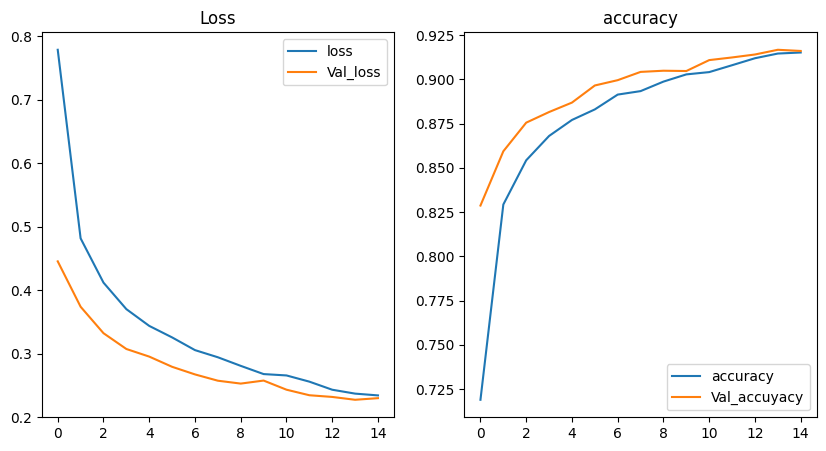

In [15]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])

plt.title("Loss")
plt.legend(["loss","Val_loss"])

plt.subplot(1,2,2)
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("accuracy")
plt.legend(["accuracy","Val_accuyacy"])

plt.show()

In [16]:
model.save("model.h5")